<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


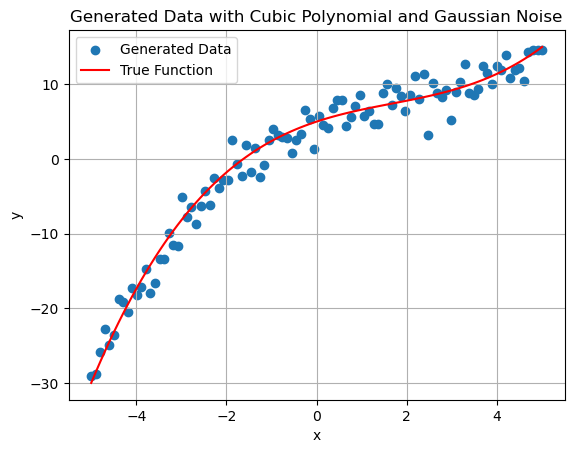

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial function
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise

# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
  - Which learning rate gives the best balance between speed and accuracy?  

Pesos finales: [ 4.82542215  2.28590903 -0.52133032  0.08905944]


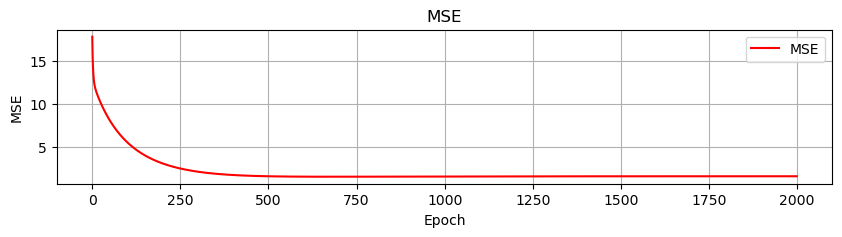

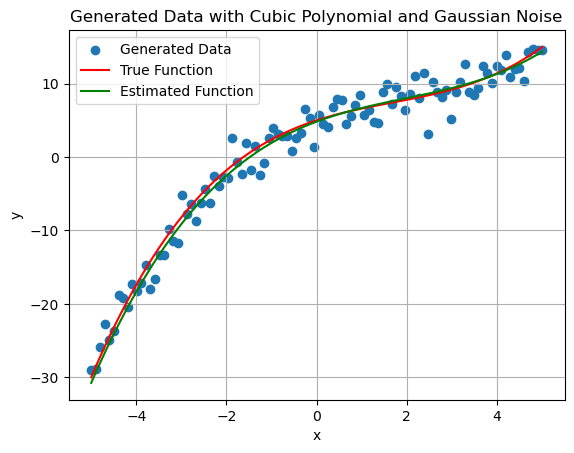

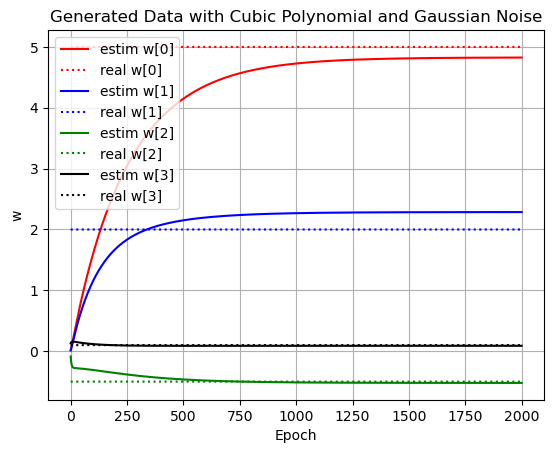

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Prediction
def predict(x,w):
    y_hat = w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
    return y_hat

# Loss function
def loss(y,y_hat):
    return 0.5 * (y - y_hat)**2

# Update
def sgd_update(x_i, y_i, w, alpha):
    y_hat = predict(x_i,w)
    error = (y_hat - y_i)
    xSt = np.array([1.0, x_i, x_i**2, x_i**3])
    w = w - alpha*error*xSt
    return w

# Training
def fit_sgd(x, y, alpha=1e-3, epochs=100, w_init=[0,0,0,0], verbose=False):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    w = np.zeros(4, dtype=float) if w_init is None else np.asarray(w_init, dtype=float).copy()

    mse_hist = []
    w_hist = []
    for ep in range(epochs):
        for i in range(len(x)):
            w = sgd_update(x[i], y[i], w, alpha)
        # MSE tracking per epoch
        y_hat = predict(x, w)
        mse = np.mean(loss(y,y_hat))
        mse_hist.append(mse)
        w_hist.append(w)
        if verbose and (ep % 1) == 0:
            print(f"Época {ep+1}/{epochs}  MSE={mse:.6f}  w={w}")
    return w, np.array(mse_hist), np.array(w_hist)



# previous generated data
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
y_true = 0.1*x**3 - 0.5*x**2 + 2*x + 5
y = y_true + np.random.normal(0, 2, n_samples)

# Running algorithm
w = np.array([0,0,0,0])
w, hist, w_hist = fit_sgd(x, y, alpha=1e-4, epochs=2000, verbose=False)
print("Pesos finales:", w)

# MSE Plot
plt.figure(figsize=(10, 2))
plt.plot(np.arange(len(hist)), hist, color='red', label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE')
plt.legend()
plt.grid(True)
plt.show()


# Estimation plot
y_est = w[3]*x**3 + w[2]*x**2 + w[1]*x + w[0]
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.plot(x, y_est, color='green', label='Estimated Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()



# Estimated weights
y_est = w[3]*x**3 + w[2]*x**2 + w[1]*x + w[0]
# plt.scatter(x, y, label='Generated Data')
plt.plot(np.arange(len(hist)), w_hist[:,0], color='red', label='estim w[0]')
plt.plot(np.arange(len(hist)), hist*0 + 5, ':', color='red', label='real w[0]')
plt.plot(np.arange(len(hist)), w_hist[:,1], color='blue', label='estim w[1]')
plt.plot(np.arange(len(hist)), hist*0 + 2, ':', color='blue', label='real w[1]')
plt.plot(np.arange(len(hist)), w_hist[:,2], color='green', label='estim w[2]')
plt.plot(np.arange(len(hist)), hist*0 + -0.5, ':', color='green', label='real w[2]')
plt.plot(np.arange(len(hist)), w_hist[:,3], color='black', label='estim w[3]')
plt.plot(np.arange(len(hist)), hist*0 + 0.1, ':', color='black', label='real w[3]')
# plt.plot(x, y_true, color='red', label='True Function')
# plt.plot(x, y_est, color='green', label='Estimated Function')
plt.xlabel('Epoch')
plt.ylabel('w')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Short discussion:

How does the learning rate affect convergence speed and stability?

  - If the learning rate is to high, the algorithm never converges and the MSE keep increasing infinitely. With short learning rates, it takes to many epochs to converge and it is very slow.

Which learning rate gives the best balance between speed and accuracy?

  - The proven learning rates that actually work are from 1e-3 to more than 1e-11, between them, 1e-4 converges fast and with low mse. 

## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  


Weights: [3.03161771e-04 9.17074632e-01] Avg episode length: 29.6818


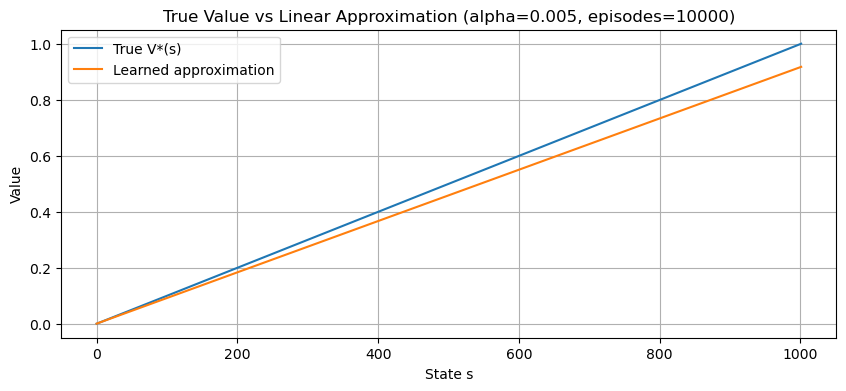

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

# ===============================
# 1000-State Random Walk Environment
# ===============================
@dataclass
class RandomWalk1000:
    n_states: int = 1000
    start_state: int = 500
    p_right: float = 0.5

    def reset(self):
        self.s = self.start_state
        return self.s

    def step(self, action=None):
        # Random move left/right with p=0.5 each
        move_right = np.random.rand() < self.p_right
        self.s = self.s + 100 if move_right else self.s - 100

        done = self.s <= 0 or self.s >= (self.n_states + 1)
        if not done:
            reward = 0.0
        else:
            if self.s <= 0:
                self.s = 0
                reward = 0.0
            else:
                self.s = self.n_states + 1
                reward = 1.0
        return self.s, reward, done, {}

# ===============================
# Linear Features and Value Approximation
# ===============================
def phi(s, n_states=1000):
    # Bias + normalized state index in [0,1]
    return np.array([1.0, s / (n_states + 1)])

def v_hat(s, w, n_states=1000):
    return float(w @ phi(s, n_states))

# ===============================
# Semi-Gradient TD(0) (SOLUTION)
# ===============================
def td0_step(w, s, r, sp, gamma, alpha, n_states=1000):
    """
    Semi-gradient TD(0) for V_hat(s; w) = w^T phi(s)
      delta = r + gamma * v_hat(sp) - v_hat(s)
      w <- w + alpha * delta * phi(s)
    If sp is terminal (0 or 1001), use bootstrap value 0.
    """
    x_s = phi(s, n_states)
    v_s = float(w @ x_s)
    v_sp = 0.0 if (sp == 0 or sp == (n_states + 1)) else v_hat(sp, w, n_states)
    delta = r + gamma * v_sp - v_s
    return w + alpha * delta * x_s

# ===============================
# Training
# ===============================
def train_td0(env, episodes=1000, alpha=0.005, gamma=1.0, seed=0):
    np.random.seed(seed)
    w = np.zeros(2)
    ep_lengths = []
    for _ in range(episodes):
        s = env.reset()
        done = False
        steps = 0
        while not done:
            sp, r, done, _ = env.step()
            w = td0_step(w, s, r, sp, gamma, alpha, env.n_states)
            s = sp
            steps += 1
        ep_lengths.append(steps)
    return w, np.array(ep_lengths)

# ===============================
# Evaluation / Plotting
# ===============================
def true_value(s, n_states=1000):
    return s / (n_states + 1)

def plot_true_vs_line(w, n_states=1000, title_suffix=""):
    s = np.arange(0, n_states + 2)
    v_true = true_value(s, n_states)
    v_line = np.array([v_hat(si, w, n_states) for si in s])
    plt.figure(figsize=(10,4))
    plt.plot(s, v_true, label="True V*(s)")
    plt.plot(s, v_line, label="Learned approximation")
    plt.xlabel("State s")
    plt.ylabel("Value")
    plt.title(f"True Value vs Linear Approximation {title_suffix}".strip())
    plt.legend()
    plt.grid(True)
    plt.show()

# ===============================
# Running the training and plotting results
# ===============================
env = RandomWalk1000()
# Fewer episodes by default to run quickly; bump to 1000+ for your report
w, ep_lengths = train_td0(env, episodes=10000, alpha=0.005, gamma=1.0, seed=0)
print("Weights:", w, "Avg episode length:", ep_lengths.mean())
plot_true_vs_line(w, title_suffix="(alpha=0.005, episodes=10000)")

- A short discussion:  
  How does the approximation behave for small vs large states?  
  - For large states it takes a lot of time to converge, with least states it's much faster.
  
  How does the learning rate affect convergence?
  - With larger learning rates the aproximation fails since we fall into the jumping effect, with lower values it converges but takes a lot of time, the best thing is to find an equilibrium between those factor.

# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


In [104]:
import gymnasium as gym
import numpy as np

# Create the MountainCar-v0 environment
env_mc = gym.make('MountainCar-v0', render_mode='human')

# Example: run one episode with a random policy
state, info = env_mc.reset()
done = False
total_reward = 0
while not done:
    action = env_mc.action_space.sample()  # Random action
    next_state, reward, terminated, truncated, info = env_mc.step(action)
    done = terminated or truncated
    total_reward += reward
    state = next_state
print("Random policy episode return:", total_reward)
env_mc.close()

Random policy episode return: -200.0


In [ ]:
import numpy as np

def epsilon_greedy(Q_func, state, n_actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    q_vals = np.array([Q_func(state, a) for a in range(n_actions)])
    return np.argmax(q_vals)

def sarsa_tile_coding(env, tile_coder, num_episodes=500, alpha=0.1, gamma=1.0, epsilon=0.1):
    n_actions = env.action_space.n
    returns = []
    for ep in range(num_episodes):
        state, _ = env.reset()
        action = epsilon_greedy(tile_coder.predict, state, n_actions, epsilon)
        done = False
        total_reward = 0
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = epsilon_greedy(tile_coder.predict, next_state, n_actions, epsilon) if not done else 0
            # Q(s,a)
            q_sa = tile_coder.predict(np.append(state, action))
            # Q(s',a')
            q_s_next_a_next = tile_coder.predict(np.append(next_state, next_action)) if not done else 0.0
            target = reward + gamma * q_s_next_a_next
            delta = target - q_sa
            tile_coder.update(np.append(state, action), target, alpha)
            state = next_state
            action = next_action
            total_reward += reward
        returns.append(total_reward)
    return returns

Random Ep 1: return -200.0, steps 200
Random Ep 2: return -200.0, steps 200
Random Ep 3: return -200.0, steps 200
Random Ep 4: return -200.0, steps 200
Random Ep 5: return -200.0, steps 200
Episode 1/2000  return=-200.0  steps=200


C:\Users\edwar\AppData\Local\Temp\ipykernel_53388\2937232098.py:192: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return float(np.sum(self.weights[a, t, idx] for t, idx in idxs))


Episode 101/2000  return=-159.0  steps=159
Episode 201/2000  return=-148.0  steps=148
Episode 301/2000  return=-153.0  steps=153
Episode 401/2000  return=-113.0  steps=113
Episode 501/2000  return=-154.0  steps=154
Episode 601/2000  return=-144.0  steps=144
Episode 701/2000  return=-113.0  steps=113
Episode 801/2000  return=-109.0  steps=109
Episode 901/2000  return=-108.0  steps=108
Episode 1001/2000  return=-142.0  steps=142
Episode 1101/2000  return=-108.0  steps=108
Episode 1201/2000  return=-153.0  steps=153
Episode 1301/2000  return=-94.0  steps=94
Episode 1401/2000  return=-107.0  steps=107
Episode 1501/2000  return=-109.0  steps=109
Episode 1601/2000  return=-112.0  steps=112
Episode 1701/2000  return=-110.0  steps=110
Episode 1801/2000  return=-145.0  steps=145
Episode 1901/2000  return=-147.0  steps=147
Episode 2000/2000  return=-154.0  steps=154

Avg random return over 5 eps: -200.00
Avg SARSA return over last 50 eps: -115.20


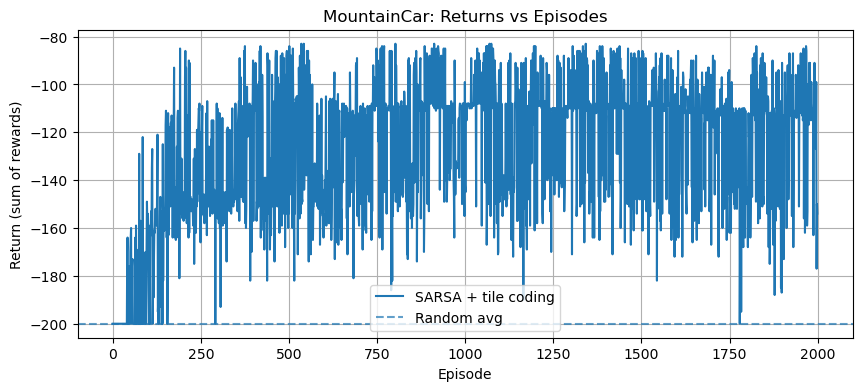

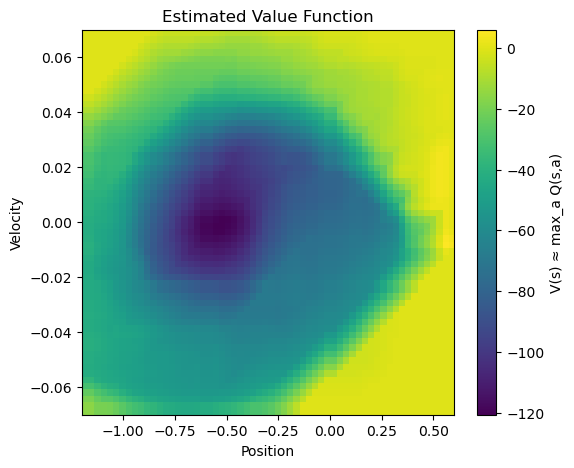

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Try gymnasium first; fall back to gym
try:
    import gymnasium as gym
    NEW_API = True
except ImportError:
    import gymnasium as gym
    NEW_API = False



# ==========================================
# TileCoderXY: Tile coder for 2D state (x,y) ignoring z
# ==========================================   
class TileCoderXY:
    """
    A TileCoder for function approximation that applies tile coding on the x and y coordinates
    of a 3D state. Instead of providing tile widths, the user provides the number of tiles per
    dimension. The tile widths are computed based on the state bounds and the number of tiles.
    The z coordinate is not used.
    """

    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        """
        Initialize the TileCoderXY.

        Parameters:
            num_tilings (int): Number of overlapping tilings.
            tiles_per_dim (array-like of 2 ints): Number of tiles along the x and y dimensions.
            state_low (array-like of 2 floats): Lower bounds for the x and y dimensions.
            state_high (array-like of 2 floats): Upper bounds for the x and y dimensions.
        """
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)

        # Compute the tile width for each dimension.
        # We assume that the grid spans exactly from state_low to state_high.
        # When there are N tiles, there are N-1 intervals between the boundaries.
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        # Precompute an offset for each tiling to create overlapping grids.
        # self.offsets = [(i / self.num_tilings) * self.tile_width for i in range(self.num_tilings)]
        # self.offsets = self.compute_8_offsets()
        # self.offsets = np.stack(self._compute_offsets(), axis=0)  # shape: (num_tilings, dims)
        # Precompute offsets for each tiling.
        # For tiling i:
        #   offset_x = (((i + 0) % num_tilings) / num_tilings) * tile_width[0]
        #   offset_y = (((i + 1) % num_tilings) / num_tilings) * tile_width[1]
        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets


        # Precompute multiplier for flattening a 2D index.
        # For grid shape (N, M), flat index = x_index * M + y_index.
        self.multiplier = self.tiles_per_dim[1]

        # Initialize a weight vector for each tiling.
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def save(self, file_name):
        np.savez(file_name + ".npz", weights=self.weights)

    def load(self, file_name):
        self.weights = np.load(file_name+".npz")["weights"]


    def compute_8_offsets(self):
        """
        Compute a list of offsets using a combination of cardinal and diagonal directions.
        The offsets include:
          - Center: [0, 0]
          - Cardinal: right, left, up, down (half-tile shifts)
          - Diagonal: up-right, up-left, down-right, down-left (half-tile shifts)

        If the number of tilings exceeds the number of unique offsets (9), the list is repeated.

        Returns:
            List of 2-element numpy arrays representing the offset for each tiling.
        """
        half_tile = self.tile_width / 8.0
        base_offsets = [
            np.array([0.0, 0.0]),  # Center (no shift)
            np.array([half_tile[0], 0.0]),  # Right
            np.array([-half_tile[0], 0.0]),  # Left
            np.array([0.0, half_tile[1]]),  # Up
            np.array([0.0, -half_tile[1]]),  # Down
            np.array([half_tile[0], half_tile[1]]),  # Up-right
            np.array([-half_tile[0], half_tile[1]]),  # Up-left
            np.array([half_tile[0], -half_tile[1]]),  # Down-right
            np.array([-half_tile[0], -half_tile[1]])  # Down-left
        ]
        offsets = []
        for i in range(self.num_tilings):
            offsets.append(base_offsets[i % len(base_offsets)])
        return offsets

    def get_tile_indices(self, state):
        """
        Compute the active tile indices for all tilings given a 2D state.

        Parameters:
            state (array-like of length 2): The input state [x, y].

        Returns:
            List of tuples (tiling_index, flat_tile_index) for each tiling.
        """
        state = np.array(state, dtype=float)  # shape: (2,)
        # Compute shifted states for all tilings in one vectorized operation.
        # Shape of shifted: (num_tilings, 2)
        shifted = (state - self.state_low) + self.offsets

        # Compute tile coordinates (integer indices) for each tiling.
        # Division is broadcasted over the offsets.
        tile_coords = (shifted / self.tile_width).astype(int)  # shape: (num_tilings, 2)

        # Clip to ensure indices are within bounds.
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)

        # Compute flat indices for each tiling.
        # flat_index = x_index * (tiles_per_dim[1]) + y_index
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]

        # Return a list of (tiling_index, flat_index) tuples.
        return list(zip(range(self.num_tilings), flat_indices))


    def predict(self, state):
        """
        Compute the approximated function value for a given 3D state using tile coding on x and y.

        Parameters:
            state (array-like): The input state [x, y, z].

        Returns:
            float: The function approximation (sum of weights for the active tiles).
        """
        active_tiles = self.get_tile_indices(state)
        return sum(self.weights[tiling][idx] for tiling, idx in active_tiles)

    def update(self, state, target, alpha):
        """
        Update the weights given a state and target value.

        Parameters:
            state (array-like): The input state [x, y, z].
            target (float): The target function value.
            alpha (float): The overall learning rate.
        """
        prediction = self.predict(state)
        error = target - prediction
        # Distribute the learning rate equally among all tilings.
        alpha_per_tiling = alpha / self.num_tilings

        active_tiles = self.get_tile_indices(state)
        for tiling, idx in active_tiles:
            self.weights[tiling][idx] += alpha_per_tiling * error







# ==========================================
# Action-value wrapper around TileCoderXY
# ==========================================
class ActionValueFunction:
    """
    Holds *separate* tile-coder weight tables per action:
      weights.shape = [n_actions, num_tilings, tiles_x * tiles_y]
    Provides Q(s,a) and SARSA-style updates at active tile indices.
    """
    def __init__(self, tilecoder: TileCoderXY, n_actions: int):
        self.tc = tilecoder
        self.n_actions = n_actions
        num_tiles = np.prod(tilecoder.tiles_per_dim)
        self.weights = np.zeros((n_actions, tilecoder.num_tilings, num_tiles), dtype=float)

    def active_indices(self, s2d, a):
        # returns list of (tiling, tile_index) for state and action a
        return self.tc.get_tile_indices(s2d)

    def q(self, state_full, a):
        # MountainCar state is (position, velocity); some Gym versions add extra info — we only use first 2 dims
        s2d = np.asarray(state_full, dtype=float)[:2]
        idxs = self.active_indices(s2d, a)
        return float(np.sum(self.weights[a, t, idx] for t, idx in idxs))

    def update(self, state_full, a, alpha, delta):
        # Distribute alpha across tilings (common practice)
        s2d = np.asarray(state_full, dtype=float)[:2]
        idxs = self.active_indices(s2d, a)
        alpha_per_tiling = alpha / self.tc.num_tilings
        for t, idx in idxs:
            self.weights[a, t, idx] += alpha_per_tiling * delta


# ===========================
# Policy: epsilon-greedy
# ===========================
def epsilon_greedy(qfunc: ActionValueFunction, s, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(qfunc.n_actions)
    q_vals = [qfunc.q(s, a) for a in range(qfunc.n_actions)]
    return int(np.argmax(q_vals))


# ==================================
# SARSA training (on-policy TD(0))
# ==================================
def sarsa_train(
    episodes=700,
    alpha=0.2,
    gamma=1.0,
    epsilon=0.1,
    num_tilings=8,
    tiles_per_dim=(8, 8),
    seed=0,
    render=False,
):
    # Env
    env = gym.make("MountainCar-v0")
    n_actions = env.action_space.n

    # Tile coder over (pos, vel)
    # MountainCar state bounds (per Gym spec):
    POS_LOW, POS_HIGH = -1.2, 0.6
    VEL_LOW, VEL_HIGH = -0.07, 0.07
    tc = TileCoderXY(
        num_tilings=num_tilings,
        tiles_per_dim=np.array(tiles_per_dim),
        state_low=np.array([POS_LOW, VEL_LOW]),
        state_high=np.array([POS_HIGH, VEL_HIGH]),
    )
    Q = ActionValueFunction(tc, n_actions)

    rng = np.random.default_rng(seed)
    np.random.seed(seed)

    returns = []

    for ep in range(episodes):
        if NEW_API:
            s, info = env.reset(seed=seed + ep)
        else:
            s = env.reset()

        a = epsilon_greedy(Q, s, epsilon)
        ep_ret, done, steps = 0.0, False, 0

        while not done:
            if render:
                env.render()

            # Step
            if NEW_API:
                s_next, r, terminated, truncated, info = env.step(a)
                done = terminated or truncated
            else:
                s_next, r, done, info = env.step(a)

            # Choose next action (on-policy)
            a_next = epsilon_greedy(Q, s_next, epsilon) if not done else 0

            # -------- SARSA update (TD target, error, weights) --------
            q_sa = Q.q(s, a)
            target = r if done else r + gamma * Q.q(s_next, a_next)
            delta = target - q_sa
            Q.update(s, a, alpha, delta)
            # ----------------------------------------------------------

            s, a = s_next, a_next
            ep_ret += r
            steps += 1

        returns.append(ep_ret)
        if (ep % 100) == 0 or ep == episodes - 1:
            print(f"Episode {ep+1}/{episodes}  return={ep_ret:.1f}  steps={steps}")

    env.close()
    return Q, np.array(returns), tc


# ===========================
# Random policy baseline
# ===========================
def run_random(episodes=10, seed=0):
    env = gym.make("MountainCar-v0")
    rng = np.random.default_rng(seed)
    returns = []
    for ep in range(episodes):
        if NEW_API:
            s, info = env.reset(seed=seed + ep)
        else:
            s = env.reset()
        done = False
        total = 0.0
        steps = 0
        while not done:
            a = env.action_space.sample()
            if NEW_API:
                s, r, terminated, truncated, info = env.step(a)
                done = terminated or truncated
            else:
                s, r, done, info = env.step(a)
            total += r
            steps += 1
        prints = f"Random Ep {ep+1}: return {total:.1f}, steps {steps}"
        print(prints)
        returns.append(total)
    env.close()
    return np.array(returns)


# ===========================
# Plot helpers
# ===========================
def plot_returns(returns, baseline=None):
    plt.figure(figsize=(10, 4))
    plt.plot(returns, label="SARSA + tile coding")
    if baseline is not None:
        plt.axhline(baseline.mean(), linestyle="--", label="Random avg", alpha=0.7)
    plt.xlabel("Episode")
    plt.ylabel("Return (sum of rewards)")
    plt.title("MountainCar: Returns vs Episodes")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_value_function(Q: ActionValueFunction, nx=60, ny=60):
    pos = np.linspace(-1.2, 0.6, nx)
    vel = np.linspace(-0.07, 0.07, ny)
    V = np.zeros((ny, nx))
    for i, v in enumerate(vel):
        for j, p in enumerate(pos):
            s = np.array([p, v])
            qs = [Q.q(s, a) for a in range(Q.n_actions)]
            V[i, j] = np.max(qs)
    plt.figure(figsize=(6, 5))
    plt.imshow(
        V,
        origin="lower",
        extent=[pos[0], pos[-1], vel[0], vel[-1]],
        aspect="auto",
    )
    plt.colorbar(label="V(s) ≈ max_a Q(s,a)")
    plt.xlabel("Position")
    plt.ylabel("Velocity")
    plt.title("Estimated Value Function")
    plt.show()


# ===========================
# Run everything
# ===========================

# Baseline
baseline_returns = run_random(episodes=5, seed=123)

# Train SARSA + tiles
Q, returns, _ = sarsa_train(
    episodes=2000,      # try 500–1000
    alpha=0.2,         # often scaled by 1/num_tilings; try 0.1–0.3
    gamma=1.0,
    epsilon=0.01,
    num_tilings=8,
    tiles_per_dim=(8, 8),
    seed=0,
    render=False,
)

print(f"\nAvg random return over {len(baseline_returns)} eps: {baseline_returns.mean():.2f}")
print(f"Avg SARSA return over last 50 eps: {returns[-50:].mean():.2f}")

plot_returns(returns, baseline=baseline_returns)
plot_value_function(Q)



- Short discussion (1–2 paragraphs):  
  Effect of tile coding parameters (number of tilings, resolution).
  - Tile parameters strongly affect the accuracy and generalization of function approximation. Increasing the number of tilings gives the agent more overlapping grids, which reduces aliasing and allows finer discrimination between similar states. This typically improves learning stability and convergence speed, since multiple tilings ensure that even small changes in position/velocity are reflected in the features. However, more tilings also mean more active features per state-action pair, which increases computation and requires adjusting the step size (α is usually scaled down by the number of tilings to avoid overly large updates).
  
  -  The resolution determines how coarse or fine each tiling is. Coarse grids generalize broadly, which can speed up early learning but limit precision near the goal. Fine grids provide high resolution, allowing the agent to learn sharper distinctions in the state space and exploit them for better control. The trade-off is that finer tilings increase the number of weights to learn, which slows down convergence unless sufficient episodes are run. In practice, performance depends on balancing tilings and resolution: too few or too coarse, and the agent fails to capture the dynamics; too many or too fine, and learning becomes slow and unstable without careful tuning of α.
